In [1]:
from google.colab import files
uploaded = files.upload()

Saving daily-minimum-temperatures-in-mex (1).csv to daily-minimum-temperatures-in-mex (1) (1).csv


In [2]:
import pandas as pd
# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

data = pd.read_csv('daily-minimum-temperatures-in-mex (1).csv')
# ,parse_dates=['Date'], index_col='Date',date_parser=dateparse)
data.head()


,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        3650 non-null   object 
 1   Daily minimum temperatures  3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [4]:
data.isna().sum()

Date                          0
Daily minimum temperatures    0
dtype: int64

In [5]:
!pip install --upgrade pandas

     |████████████████████████████████| 11.3 MB 6.8 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.2 which is incompatible.


In [5]:
!pip install pmdarima
! pip install statsmodels
! pip install statsmodels

     |████████████████████████████████| 1.5 MB 8.5 MB/s 
     |████████████████████████████████| 9.5 MB 36.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


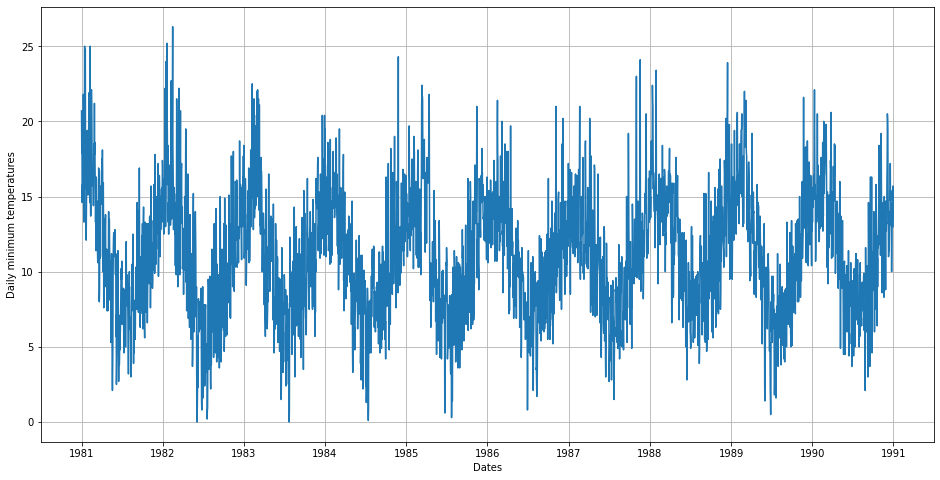

In [6]:
import matplotlib.pyplot as plt

dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
data = pd.read_csv('daily-minimum-temperatures-in-mex (1).csv', sep=',', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Daily minimum temperatures')
plt.plot(data['Daily minimum temperatures']);


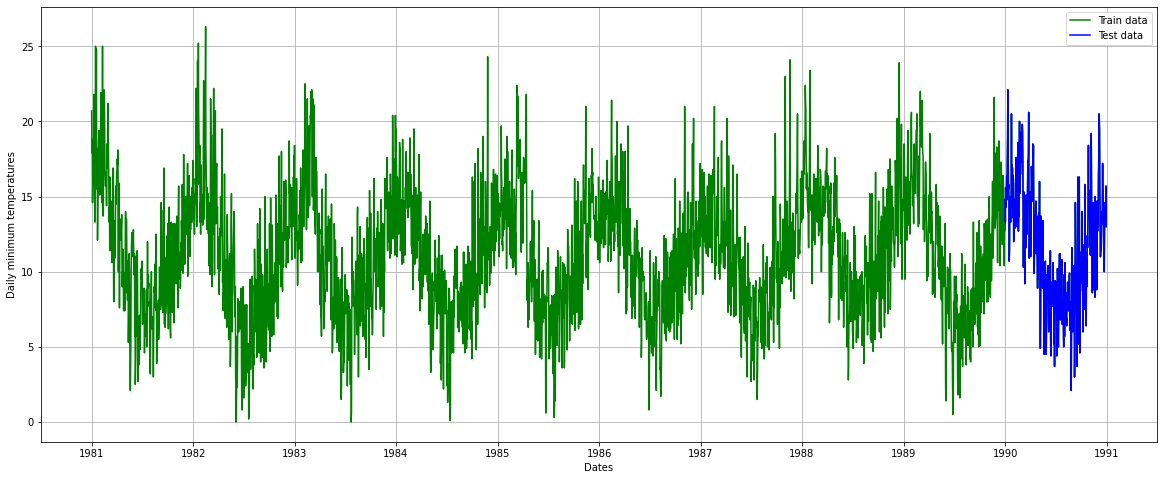

In [7]:
train_data, test_data = data[0:int(len(data)*0.9)], data[int(len(data)*0.9):]
plt.figure(figsize=(20,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Daily minimum temperatures')
plt.plot(data['Daily minimum temperatures'], 'green', label='Train data')
plt.plot(test_data['Daily minimum temperatures'], 'blue', label='Test data')
plt.legend()

In [8]:
import statsmodels
from pmdarima import auto_arima


stepwise_fit = auto_arima(data['Daily minimum temperatures'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=16781.136, Time=5.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20611.139, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=17265.725, Time=0.34 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=18554.160, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=28436.596, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=16816.370, Time=3.38 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=16831.033, Time=4.63 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=16780.222, Time=7.54 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=16777.600, Time=6.26 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=17113.438, Time=1.60 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=16779.598, Time=7.39 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=17245.958, Time=1.06 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=17030.851, Time=1.97 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=16781.448, Time=5.31 sec
 ARIMA(3,0,1)(0,0,0

In [9]:
from statsmodels.tsa.arima_model import ARIMA
# Build Model
model = ARIMA(train_data['Daily minimum temperatures'], order=(3, 0, 1))  
fitted = model.fit(disp=1)  
print(fitted.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

                                  ARMA Model Results                                  
Dep. Variable:     Daily minimum temperatures   No. Observations:                 3285
Model:                             ARMA(3, 1)   Log Likelihood               -7566.026
Method:                               css-mle   S.D. of innovations              2.421
Date:                        Thu, 19 Aug 2021   AIC                          15144.051
Time:                                14:33:23   BIC                          15180.634
Sample:                                     0   HQIC                         15157.149
                                                                                      
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               11.4366      0.893     12.809      0.000       9.687      13.187
a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


<Figure size 1152x576 with 0 Axes>

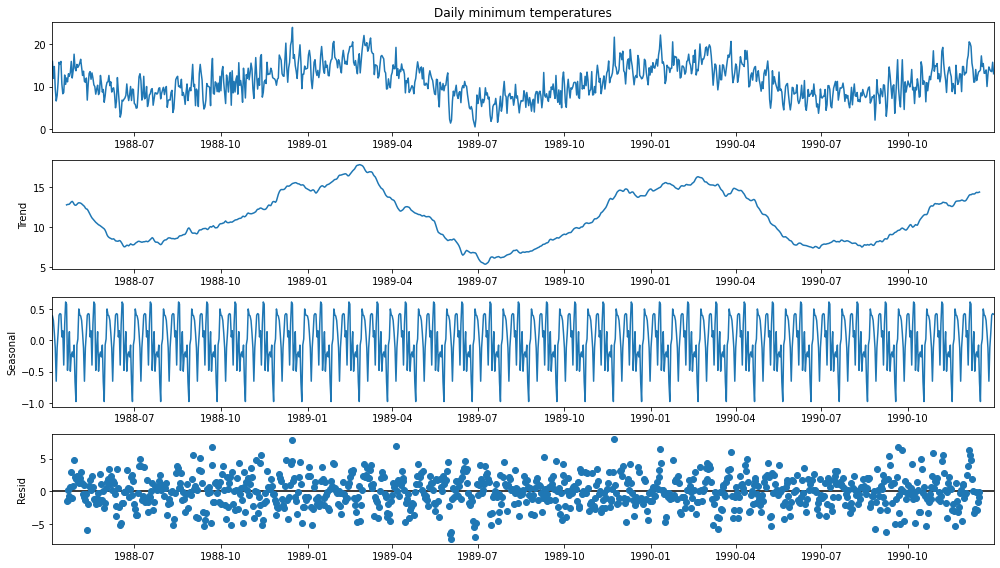

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
data_arima = data['Daily minimum temperatures']
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data_arima[-1000:], model='additive', freq=30)
plt.figure(figsize=(16,8))
fig = result.plot()
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

train_arima = train_data['Daily minimum temperatures']
test_arima = test_data['Daily minimum temperatures']

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(3,0,1))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(3,0,1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


MSE: 5.106383206882582
MAE: 1.7384946179454022
RMSE: 2.259730781947837


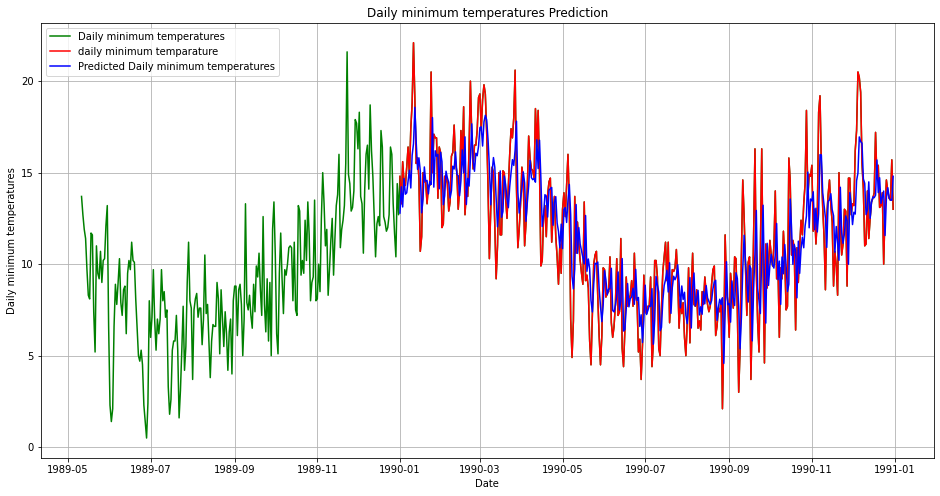

In [16]:
plt.figure(figsize=(16,8))
plt.plot(data.index[-600:], data['Daily minimum temperatures'].tail(600), color='green', label = 'Daily minimum temperatures')
plt.plot(test_data.index, y, color = 'red', label = 'daily minimum temparature')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Daily minimum temperatures')
plt.title('Daily minimum temperatures Prediction')
plt.xlabel('Date')
plt.ylabel('Daily minimum temperatures')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()

In [14]:
predictions

[array([12.79091036]),
 array([14.2281509]),
 array([13.12483678]),
 array([14.67991235]),
 array([13.82216478]),
 array([13.89899276]),
 array([14.54347013]),
 array([15.13108063]),
 array([14.16121672]),
 array([15.94822125]),
 array([16.58059078]),
 array([18.5672773]),
 array([16.65258666]),
 array([15.18065136]),
 array([15.80980934]),
 array([15.0992679]),
 array([12.80636634]),
 array([13.553516]),
 array([15.31026987]),
 array([14.52950024]),
 array([14.57420647]),
 array([13.84135921]),
 array([14.51616612]),
 array([14.35570212]),
 array([18.00814568]),
 array([14.20784509]),
 array([16.19641443]),
 array([15.89082705]),
 array([15.99796704]),
 array([14.1186136]),
 array([16.11281605]),
 array([15.60054635]),
 array([13.24760731]),
 array([13.73320851]),
 array([15.0787021]),
 array([14.71423879]),
 array([14.47167212]),
 array([13.61352003]),
 array([14.01057023]),
 array([15.35208105]),
 array([15.20058344]),
 array([16.13699151]),
 array([14.89811265]),
 array([14.8450361

In [15]:
test_data['Daily minimum temperatures']

Date
1990-01-01    14.8
1990-01-02    13.3
1990-01-03    15.6
1990-01-04    14.5
1990-01-05    14.3
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Daily minimum temperatures, Length: 365, dtype: float64